# **0. Importación de <ins>librerías</ins> y <ins>carga de archivos</ins>**

In [1]:
# Importar las librerías necesarias
import pandas as pd
from pycaret.time_series import TSForecastingExperiment
import pandas as pd


In [2]:
# Cargar los archivos
df_merged = pd.read_csv('Dataframe_final.csv')
df_merged_last_prices = pd.read_csv('Prediccion_precios.csv')

df_merged_last_prices['ID_producto'] = df_merged_last_prices['ID_producto'].astype('category')
df_merged_last_prices['Promocion'] = df_merged_last_prices['Promocion'].astype('category')
df_merged_last_prices['Fecha_venta'] = pd.to_datetime(df_merged_last_prices['Fecha_venta'])
df_merged_last_prices['Precio_unidad'] = df_merged_last_prices['Precio_unidad'].astype('float')

# **1. <ins>Transformación</ins> del Dataframe**

In [3]:
df_merged.head()

,ID_tienda,Fecha_venta,ID_producto,Cant_vendidas,Facturacion,Precio_unidad,Dia_sem,Status,ID_proveedor,Categoria,Clasif_proveedor,Promocion,Año,Mes,Lag_1,Rolling_Mean_7,Rolling_Std_7,Dia_del_Mes,Cluster
0,5201,2021-05-08,561818,6,1488.0,248.0,Sábado,1,65987,216,1,No,2021,5,10.0,4.857143,3.023716,8,3
1,5201,2021-05-08,562189,4,1076.0,269.0,Sábado,1,10214,216,1,No,2021,5,5.0,3.714286,1.799471,8,3
2,5201,2021-05-08,560779,36,9684.0,269.0,Sábado,1,10214,216,1,No,2021,5,9.0,13.714286,10.387722,8,1
3,5201,2021-05-08,560576,6,1614.0,269.0,Sábado,1,10214,216,1,No,2021,5,3.0,2.571429,1.718249,8,3
4,5201,2021-05-08,604216,2,458.0,229.0,Sábado,1,10214,216,1,No,2021,5,3.0,2.142857,0.690066,8,0


In [4]:
## CONVERTIMOS LAS VARIABLES DEL DATAFRAME "df_merged" al tipo que les corresponde

# Convertir las variables del DataFrame "df_merged" al tipo que les corresponde
df_merged['ID_tienda'] = df_merged['ID_tienda'].astype('category')
df_merged['Fecha_venta'] = pd.to_datetime(df_merged['Fecha_venta'])
df_merged['ID_producto'] = df_merged['ID_producto'].astype('category')
df_merged['Status'] = df_merged['Status'].astype('category')
df_merged['ID_proveedor'] = df_merged['ID_proveedor'].astype('category')
df_merged['Categoria'] = df_merged['Categoria'].astype('category')
df_merged['Clasif_proveedor'] = df_merged['Clasif_proveedor'].astype('category')
df_merged['Año'] = df_merged['Año'].astype('category')
df_merged['Mes'] = df_merged['Mes'].astype('category')
df_merged['Dia_del_Mes'] = df_merged['Dia_del_Mes'].astype('category')
df_merged['Cluster'] = df_merged['Cluster'].astype('category')
df_merged['Dia_sem'] = df_merged['Dia_sem'].astype('category')
df_merged['Promocion'] = df_merged['Promocion'].astype('category')
df_merged['Precio_unidad'] = df_merged['Precio_unidad'].astype('float')
df_merged['Lag_1'] = df_merged['Lag_1'].astype('float')
df_merged['Rolling_Mean_7'] = df_merged['Rolling_Mean_7'].astype('float')
df_merged['Rolling_Std_7'] = df_merged['Rolling_Std_7'].astype('float')

In [5]:
## DIVIDIMOS EL DATAFRAME ORIGINAL EN CLUSTERES

# Definimos cada cluster
cluster_0 = df_merged[df_merged['Cluster'] == 0] # Cluster 0
cluster_1 = df_merged[df_merged['Cluster'] == 1] # Cluster 1
cluster_2 = df_merged[df_merged['Cluster'] == 2] # Cluster 2
cluster_3 = df_merged[df_merged['Cluster'] == 3] # Cluster 3

# Creamos una tabla con la cantidad de filas y la suma de 'Cant_vendidas' para cada cluster
cluster_summary = {
    'Cluster': [0, 1, 2, 3],
    'Cantidad de filas': [
        len(cluster_0),
        len(cluster_1),
        len(cluster_2),
        len(cluster_3)
    ],
    'Suma de Cant_vendidas': [
        cluster_0['Cant_vendidas'].sum(),
        cluster_1['Cant_vendidas'].sum(),
        cluster_2['Cant_vendidas'].sum(),
        cluster_3['Cant_vendidas'].sum()
    ]
}

cluster_summary_df = pd.DataFrame(cluster_summary)
print(cluster_summary_df)

   Cluster  Cantidad de filas  Suma de Cant_vendidas
0        0              72791                 191579
1        1               4851                  60425
2        2                  0                      0
3        3              35612                 211837


# **2. <ins>Simulación<ins> de los modelos**



### **2.1 <ins>Cluster 0</ins>**



##### **2.1.1 Configuración de <ins>PyCaret</ins>**

In [6]:
## CONFIGURACIÓN DE PYCARET

from pycaret.regression import setup

# Configurar PyCaret para el Cluster 0
exp = setup(
    data=cluster_0,
    target='Cant_vendidas',
    categorical_features=['ID_producto', 'Dia_sem', 'Promocion', 'Año', 'Mes', 'Dia_del_Mes'],
    numeric_features=['Precio_unidad', 'Lag_1', 'Rolling_Mean_7', 'Rolling_Std_7'],
    ignore_features=['ID_tienda', 'Fecha_venta', 'Status', 'ID_proveedor', 'Clasif_proveedor', 'Categoria', 'Cluster', 'Facturacion'],
    normalize=True,
    transformation=True,
    #transformation_method='yeo-johnson',
    fold_strategy='timeseries',
    fold=5,
    session_id=123,
    data_split_shuffle=False,
    remove_outliers=True
)

,Description,Value
0,Session id,123
1,Target,Cant_vendidas
2,Target type,Regression
3,Original data shape,"(72791, 19)"
4,Transformed data shape,"(70243, 30)"
5,Transformed train set shape,"(48405, 30)"
6,Transformed test set shape,"(21838, 30)"
7,Ignore features,8
8,Numeric features,4
9,Categorical features,6



##### **2.1.2 Determinación <ins>modelo óptimo</ins>**

In [7]:
## DETERMINACIÓN MEJOR MODELO

from pycaret.regression import compare_models, tune_model

# Comparamos modelos y seleccionamos el mejor
best_model_0 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.4994,12.2403,3.4368,0.3589,0.4535,0.6944,1.9300
et,Extra Trees Regressor,1.4960,12.4252,3.4615,0.3462,0.4555,0.7030,0.4800
lightgbm,Light Gradient Boosting Machine,1.4858,12.7282,3.5075,0.3180,0.4494,0.6744,0.3560
rf,Random Forest Regressor,1.5338,12.7682,3.5232,0.3101,0.4638,0.7530,0.5640
gbr,Gradient Boosting Regressor,1.5248,13.0273,3.5584,0.3006,0.4511,0.7241,1.1120
xgboost,Extreme Gradient Boosting,1.5351,13.6530,3.6255,0.2725,0.4667,0.7158,0.3600
ada,AdaBoost Regressor,1.8249,14.7991,3.7503,0.2218,0.5198,1.0341,0.4120
knn,K Neighbors Regressor,1.6058,15.8234,3.9096,0.1815,0.4963,0.6472,0.5980
br,Bayesian Ridge,2.0889,16.5675,3.9871,0.1541,0.5906,1.1835,0.2940
ridge,Ridge Regression,2.0931,16.5876,3.9892,0.1533,0.5916,1.1867,0.6760


In [21]:
## AJUSTE DE MODELO

# Suponiendo que ya tienes tu mejor modelo optimizado
tuned_model_0 = tune_model(best_model_0, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5501,12.6708,3.5596,0.0315,0.5219,0.9686
1,1.3990,10.6554,3.2643,0.3917,0.4107,0.4918
2,1.7872,16.4051,4.0503,0.5269,0.4951,0.8623
3,1.0222,5.6047,2.3674,0.4423,0.3691,0.5286
4,1.6278,12.3983,3.5211,0.5151,0.4248,0.6017
Mean,1.4772,11.5468,3.3525,0.3815,0.4443,0.6906
Std,0.2597,3.5127,0.5543,0.1818,0.0561,0.1899


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [23]:
from pycaret.regression import create_model, predict_model, ensemble_model, blend_models
#Ensamblaje tipo Boosting
boosted_model_0 = ensemble_model(best_model_0, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6220,12.9895,3.6041,0.0071,0.5435,1.0615
1,1.3966,10.1710,3.1892,0.4193,0.4161,0.5076
2,2.0077,19.2630,4.3890,0.4445,0.5487,1.0512
3,1.0672,5.6133,2.3692,0.4414,0.3845,0.5913
4,1.6334,11.9584,3.4581,0.5323,0.4286,0.6371
Mean,1.5454,11.9991,3.4019,0.3689,0.4643,0.7697
Std,0.3092,4.4242,0.6527,0.1850,0.0683,0.2377


In [16]:
# Ensamble usando bagging
bagged_dt_0 = ensemble_model(best_model_0, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5473,12.3723,3.5174,0.0543,0.5268,0.9862
1,1.3690,10.7240,3.2748,0.3877,0.4109,0.4415
2,1.9066,17.8671,4.2269,0.4848,0.5265,0.9586
3,0.9795,5.2051,2.2815,0.4820,0.3564,0.4894
4,1.5785,11.8607,3.4439,0.5361,0.4131,0.5737
Mean,1.4762,11.6058,3.3489,0.3890,0.4468,0.6899
Std,0.3030,4.0399,0.6250,0.1741,0.0683,0.2347


In [17]:
RandomForest_0 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6870,14.9748,3.8697,-0.1446,0.5655,1.1168
1,1.4345,11.3182,3.3643,0.3538,0.4235,0.5204
2,1.8913,18.4680,4.2974,0.4674,0.5243,0.9553
3,1.0434,6.2923,2.5084,0.3739,0.3805,0.5543
4,1.6126,12.7875,3.5760,0.4999,0.4251,0.6183
Mean,1.5338,12.7682,3.5232,0.3101,0.4638,0.7530
Std,0.2856,4.0348,0.5962,0.2339,0.0694,0.2387


In [22]:
# Crear un modelo de ensamble
ensemble_model = blend_models([tuned_model, RandomForest_0])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6048,13.2254,3.6367,-0.0109,0.5390,1.0375
1,1.3964,10.5175,3.2431,0.3995,0.4083,0.5013
2,1.8198,16.5458,4.0677,0.5229,0.5063,0.9025
3,1.0193,5.5668,2.3594,0.4461,0.3687,0.5363
4,1.6044,12.2127,3.4947,0.5223,0.4181,0.6065
Mean,1.4889,11.6136,3.3603,0.3760,0.4481,0.7168
Std,0.2703,3.6069,0.5675,0.1991,0.0639,0.2138


In [32]:
final_model_0 = create_model(boosted_model_0)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6220,12.9895,3.6041,0.0071,0.5435,1.0615
1,1.3966,10.1710,3.1892,0.4193,0.4161,0.5076
2,2.0077,19.2630,4.3890,0.4445,0.5487,1.0512
3,1.0672,5.6133,2.3692,0.4414,0.3845,0.5913
4,1.6334,11.9584,3.4581,0.5323,0.4286,0.6371
Mean,1.5454,11.9991,3.4019,0.3689,0.4643,0.7697
Std,0.3092,4.4242,0.6527,0.1850,0.0683,0.2377


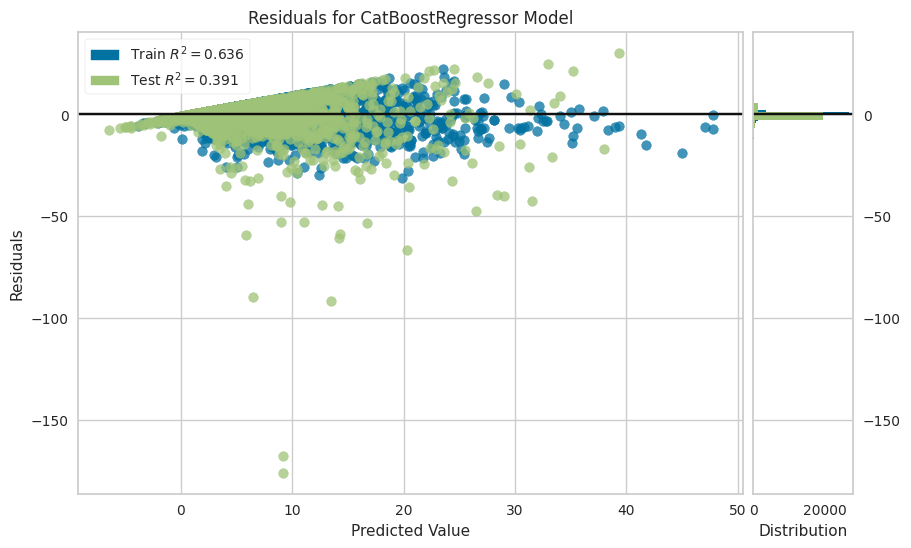

<Figure size 1000x600 with 0 Axes>

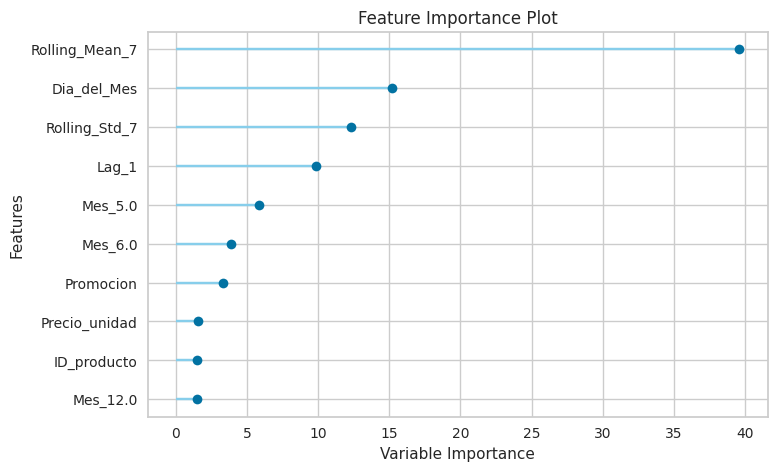

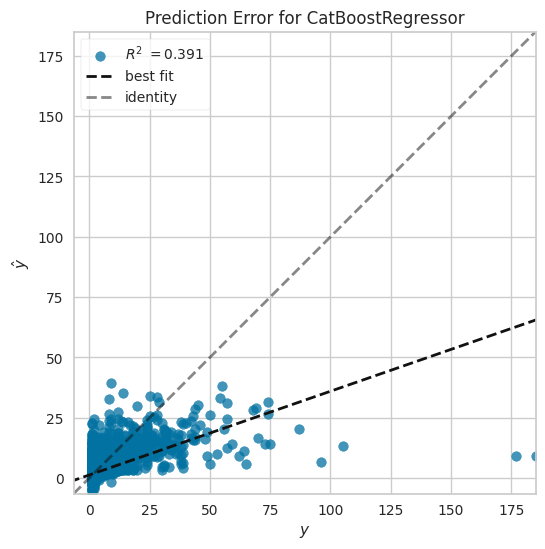

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [9]:
from pycaret.regression import tune_model, plot_model, evaluate_model
import matplotlib.pyplot as plt

# Gráfico de errores residuales
plt.figure(figsize=(10, 6))
plot_model(tuned_model, plot='residuals', save=False)

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
plot_model(tuned_model, plot='feature')

# Gráfico de predicción
plt.figure(figsize=(10, 6))
plot_model(tuned_model, plot='error')

# Evaluación del modelo
evaluate_model(tuned_model)



##### **2.1.3 <ins>Predicción Ventas</ins>**

In [33]:
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from pycaret.regression import predict_model
from multiprocessing import Pool, cpu_count

# Normalización de los datos numéricos
scaler = StandardScaler()

# Función para normalizar las columnas específicas en el DataFrame
def normalizar_columnas(df, columnas):
    df[columnas] = scaler.fit_transform(df[columnas])
    return df

# Aplicar la normalización a las columnas numéricas del DataFrame original
df_merged = normalizar_columnas(df_merged, ['Cant_vendidas', 'Precio_unidad', 'Lag_1', 'Rolling_Mean_7', 'Rolling_Std_7'])

# Obtenemos los productos únicos en el Cluster 0
productos = cluster_0['ID_producto'].unique()

# Solicitamos al usuario fecha de inicio de las predicciones y si hay promoción
fecha_inicio = input("Introduce la fecha de inicio para las predicciones (YYYY-MM-DD): ")
promocion_input = input("¿Alguno de los productos estará en promoción? (Si/No): ")

# Convertimos la fecha de inicio a un objeto datetime
fecha_inicio = datetime.strptime(fecha_inicio, "%Y-%m-%d")

# Verificamos que la fecha de inicio esté dentro del rango de los datos del Cluster 0
fecha_fin_datos_cluster_0 = cluster_0['Fecha_venta'].max()

if fecha_inicio <= fecha_fin_datos_cluster_0:
    print("La fecha de inicio debe ser posterior a la fecha final de los datos: ", fecha_fin_datos_cluster_0)
    exit(1)

# Inicializamos un diccionario para almacenar la información de promociones
promociones = {}
fecha_inicio_promo = None
fecha_fin_promo = None

if promocion_input.lower() == 'si':
    promo_tipo = input("¿Estarán en promoción 'Todos' o 'Algunos' los productos?: ").lower()
    fecha_inicio_promo = input("Introduce la fecha de inicio de la promoción (YYYY-MM-DD): ")
    fecha_fin_promo = input("Introduce la fecha de fin de la promoción (YYYY-MM-DD): ")
    fecha_inicio_promo = datetime.strptime(fecha_inicio_promo, "%Y-%m-%d")
    fecha_fin_promo = datetime.strptime(fecha_fin_promo, "%Y-%m-%d")

    if fecha_inicio_promo > fecha_fin_promo:
        raise ValueError("La fecha de inicio de la promoción debe ser anterior a la fecha de fin.")

    if promo_tipo == 'todos':
        promociones = {producto: 1 for producto in productos}
    elif promo_tipo == 'algunos':
        productos_en_promo = input("Enumere los IDs de los productos en promoción separados por comas: ").split(',')
        promociones = {producto: 1 if producto in productos_en_promo else 0 for producto in productos}
else:
    promociones = {producto: 0 for producto in productos}

# Función para obtener el precio del producto con manejo de errores
def obtener_precio(x, producto):
    try:
        if promocion_input.lower() == 'si' and fecha_inicio_promo <= x <= fecha_fin_promo:
            return df_merged_last_prices[(df_merged_last_prices['ID_producto'] == producto) &
                                         (df_merged_last_prices['Fecha_venta'] == x)]['Precio_unidad'].values[0]
        else:
            return df_merged_last_prices[df_merged_last_prices['ID_producto'] == producto]['Precio_unidad'].values[0]
    except IndexError:
        # Valor predeterminado si no se encuentra el precio
        return df_merged_last_prices[df_merged_last_prices['ID_producto'] == producto]['Precio_unidad'].mean()

# Función para predecir para un producto
def predecir_producto(producto):
    dias_a_predecir = 15
    fechas_prediccion = pd.date_range(start=fecha_inicio, periods=dias_a_predecir, freq='D')
    df_prediccion = pd.DataFrame(fechas_prediccion, columns=['Fecha_venta'])
    df_prediccion['ID_producto'] = producto
    df_prediccion['Precio_unidad'] = df_prediccion['Fecha_venta'].apply(lambda x: obtener_precio(x, producto))

    df_prediccion['Dia_sem'] = df_prediccion['Fecha_venta'].dt.strftime('%A').map({
        'Monday': 'Lunes',
        'Tuesday': 'Martes',
        'Wednesday': 'Miércoles',
        'Thursday': 'Jueves',
        'Friday': 'Viernes',
        'Saturday': 'Sábado',
        'Sunday': 'Domingo'
    }).astype('category')

    if promociones[producto] == 1:
        df_prediccion['Promocion'] = df_prediccion['Fecha_venta'].apply(lambda x: 'Si' if fecha_inicio_promo <= x <= fecha_fin_promo else 'No')
        if (fechas_prediccion.min() > fecha_fin_promo) or (fechas_prediccion.max() < fecha_inicio_promo):
            print(f"Alerta: La promoción para el producto {producto} está fuera del rango de predicción.")
    else:
        df_prediccion['Promocion'] = 'No'

    df_prediccion['Año'] = df_prediccion['Fecha_venta'].dt.year.astype('category')
    df_prediccion['Mes'] = df_prediccion['Fecha_venta'].dt.month.astype('category')
    df_prediccion['Dia_del_Mes'] = df_prediccion['Fecha_venta'].dt.day.astype('category')

    fecha_prev_lag = cluster_0[cluster_0['Fecha_venta'] == (fecha_inicio - timedelta(days=7))]['Lag_1'].mean()
    df_prediccion['Lag_1'] = fecha_prev_lag

    rolling_mean_7 = cluster_0[cluster_0['Fecha_venta'].between(fecha_inicio - timedelta(days=6), fecha_inicio)]['Rolling_Mean_7'].median()
    df_prediccion['Rolling_Mean_7'] = rolling_mean_7

    rolling_std_7 = cluster_0[cluster_0['Fecha_venta'].between(fecha_inicio - timedelta(days=6), fecha_inicio)]['Rolling_Std_7'].median()
    df_prediccion['Rolling_Std_7'] = rolling_std_7

    expected_columns = ['ID_producto', 'Precio_unidad', 'Dia_sem', 'Promocion', 'Año', 'Mes', 'Lag_1', 'Rolling_Mean_7', 'Rolling_Std_7', 'Dia_del_Mes']
    for col in expected_columns:
        if col not in df_prediccion.columns:
            raise ValueError(f"Missing column: {col}")

    predicciones = predict_model(final_model_0, data=df_prediccion)
    predicciones['ID_producto'] = producto
    predicciones['Precio_unidad'] = df_prediccion['Precio_unidad']
    predicciones['Promocion'] = df_prediccion['Promocion']
    predicciones['Dia_sem'] = df_prediccion['Dia_sem']

    predicciones['prediction_label'] = predicciones['prediction_label'].apply(lambda x: max(int(x) + 1 if x % 1 >= 0.5 else int(x), 0))

    media_predicciones = predicciones['prediction_label'].mean()
    predicciones['prediction_label'] = predicciones['prediction_label'].apply(lambda x: x if x > media_predicciones else 0)

    return predicciones

# Paralelizar la predicción para todos los productos
if __name__ == "__main__":
    with Pool(cpu_count()) as pool:
        all_predictions = pool.map(predecir_producto, productos)

    # Combinar todas las predicciones en un solo DataFrame
    all_predictions_df = pd.concat(all_predictions, ignore_index=True)

    df_final_predicciones = all_predictions_df[['Fecha_venta', 'ID_producto', 'Dia_sem', 'Precio_unidad', 'Promocion', 'prediction_label']]
    df_final_predicciones.columns = ['Fecha_venta', 'ID_producto', 'Dia_sem', 'Precio_unidad', 'Promocion', 'Cantidades predichas']

    df_final_predicciones.reset_index(drop=True, inplace=True)

    df_resumen = df_final_predicciones.groupby('ID_producto').agg(
        Fecha_inicio=('Fecha_venta', 'min'),
        Fecha_fin=('Fecha_venta', 'max'),
        Cantidades_vendidas=('Cantidades predichas', 'sum'),
        Facturacion=('Precio_unidad', lambda x: (x * df_final_predicciones.loc[x.index, 'Cantidades predichas']).sum())
    ).reset_index()

    df_final_predicciones.to_csv('predicciones_cluster_0.csv', index=False)
    df_resumen.to_csv('resumen_predicciones_cluster_0.csv', index=False)


Introduce la fecha de inicio para las predicciones (YYYY-MM-DD):  2024-05-02
¿Alguno de los productos estará en promoción? (Si/No):  No



##### **2.1.4 Visualización de <ins>predicciones</ins>**

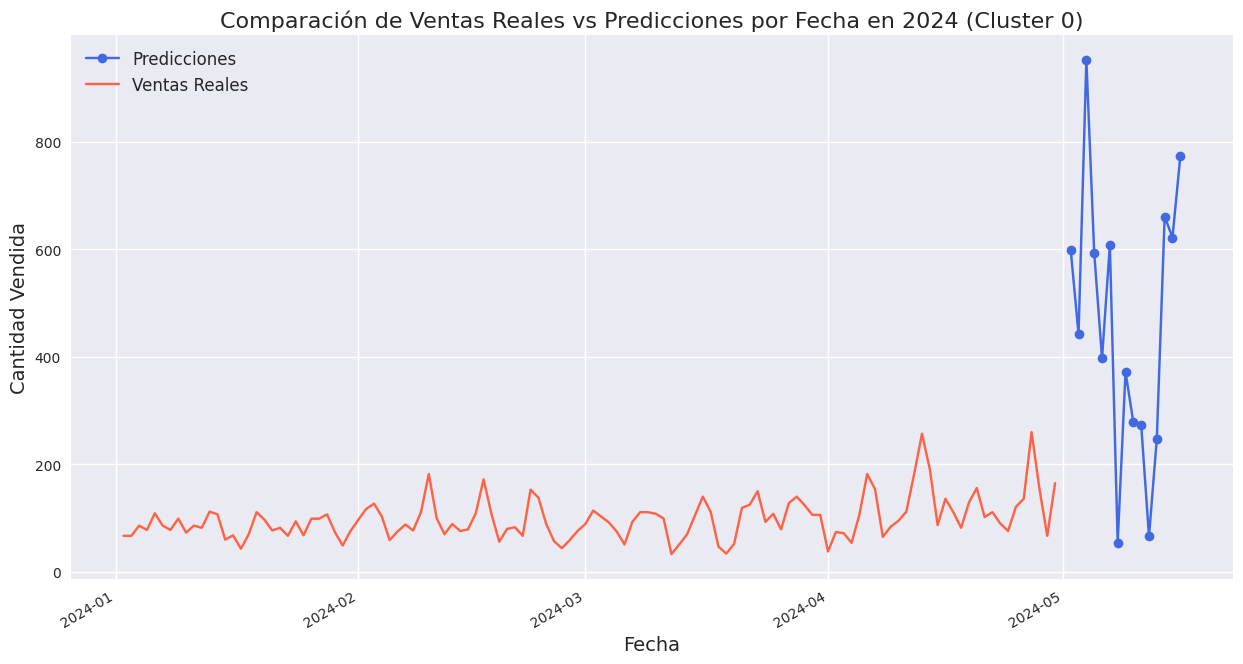

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

# Convertir la columna 'Fecha_venta' de df_merged a datetime si no lo está ya
df_merged['Fecha_venta'] = pd.to_datetime(df_merged['Fecha_venta'])
df_final_predicciones['Fecha_venta'] = pd.to_datetime(df_final_predicciones['Fecha_venta'])

# Filtrar los datos del año 2024 para el cluster 0
year_vigente = 2024
cluster_0_vigente = cluster_0[cluster_0['Fecha_venta'].dt.year == year_vigente]
predicciones_vigente = df_final_predicciones[df_final_predicciones['Fecha_venta'].dt.year == year_vigente]

# Agrupar por fecha y sumar las cantidades vendidas y predichas
historicos_agrupados = cluster_0_vigente.groupby('Fecha_venta')['Cant_vendidas'].sum().reset_index()
predicciones_agrupadas = predicciones_vigente.groupby('Fecha_venta')['Cantidades predichas'].sum().reset_index()

plt.figure(figsize=(15, 8))  # Tamaño del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo de fondo de cuadrícula con tema oscuro

# Gráfico de predicciones
plt.plot(predicciones_agrupadas['Fecha_venta'], predicciones_agrupadas['Cantidades predichas'], label='Predicciones', marker='o', linestyle='-', color='royalblue')

# Gráfico de ventas reales
plt.plot(historicos_agrupados['Fecha_venta'], historicos_agrupados['Cant_vendidas'], label='Ventas Reales', marker='x', linestyle='-', color='tomato')

# Configuración de los formatos de fecha en el eje X
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Intervalo mensual
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato año-mes

plt.title('Comparación de Ventas Reales vs Predicciones por Fecha en 2024 (Cluster 0)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Mejorar la rotación y alineación de las etiquetas de fecha
plt.gcf().autofmt_xdate()

plt.savefig('high_quality_chart.png', dpi=300)  # Guardar como imagen de alta calidad
plt.show()




### **2.2 <ins>Cluster 1</ins>**



##### **2.2.1 Configuración de <ins>PyCaret</ins>**

In [ ]:
## CONFIGURACIÓN DE PYCARET

from pycaret.regression import setup

# Configurar PyCaret para el Cluster 1
exp = setup(
    data=cluster_1,
    target='Cant_vendidas',
    categorical_features=['ID_producto', 'Dia_sem', 'Promocion', 'Año', 'Mes', 'Dia_del_Mes'],
    numeric_features=['Precio_unidad', 'Lag_1', 'Rolling_Mean_7', 'Rolling_Std_7'],
    ignore_features=['ID_tienda', 'Fecha_venta', 'Status', 'ID_proveedor', 'Clasif_proveedor', 'Categoria', 'Cluster', 'Facturacion'],
    normalize=True,
    transformation=True,
    #transformation_method='yeo-johnson',  # Ajustar método de transformación
    fold_strategy='timeseries',
    fold=5,
    session_id=123,
    data_split_shuffle=False,
    remove_outliers=False  # Desactivar remover outliers para probar
)


##### **2.2.2 Determinación <ins>modelo óptimo</ins>**

In [ ]:
## DETERMINACIÓN MEJOR MODELO

from pycaret.regression import compare_models, tune_model

# Comparamos modelos y seleccionamos el mejor
best_model_1 = compare_models()

In [ ]:
## AJUSTE DE MODELO

# Ajustamos el mejor modelo encontrado
best_model_0 = tune_model(best_model_0)


##### **2.2.3 <ins>Predicción Ventas</ins>**

In [ ]:
from pycaret.regression import predict_model
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler

# Normalización de los datos numéricos
scaler = StandardScaler()

# Función para normalizar las columnas específicas en el DataFrame
def normalizar_columnas(df, columnas):
    df[columnas] = scaler.fit_transform(df[columnas])
    return df

# Aplicar la normalización a las columnas numéricas del DataFrame original
df_merged = normalizar_columnas(df_merged, ['Cant_vendidas', 'Precio_unidad', 'Lag_1', 'Rolling_Mean_7', 'Rolling_Std_7'])

# Obtenemos los productos únicos en el Cluster 1
productos = cluster_1['ID_producto'].unique()

# Solicitamos al usuario fecha de inicio de las predicciones y si hay promoción
fecha_inicio = input("Introduce la fecha de inicio para las predicciones (YYYY-MM-DD): ")
promocion_input = input("¿Alguno de los productos estará en promoción? (Si/No): ")

# Convertimos la fecha de inicio a un objeto datetime
fecha_inicio = datetime.strptime(fecha_inicio, "%Y-%m-%d")

# Verificamos que la fecha de inicio esté dentro del rango de los datos del Cluster 1
fecha_fin_datos_cluster_1 = cluster_1['Fecha_venta'].max()

if fecha_inicio <= fecha_fin_datos_cluster_1:
    print("La fecha de inicio debe ser posterior a la fecha final de los datos: ", fecha_fin_datos_cluster_1)
else:
    # Inicializamos un diccionario para almacenar la información de promociones
    promociones = {}
    fecha_inicio_promo = None
    fecha_fin_promo = None

    if promocion_input.lower() == 'si':
        promo_tipo = input("¿Estarán en promoción 'Todos' o 'Algunos' los productos?: ").lower()
        fecha_inicio_promo = input("Introduce la fecha de inicio de la promoción (YYYY-MM-DD): ")
        fecha_fin_promo = input("Introduce la fecha de fin de la promoción (YYYY-MM-DD): ")
        fecha_inicio_promo = datetime.strptime(fecha_inicio_promo, "%Y-%m-%d")
        fecha_fin_promo = datetime.strptime(fecha_fin_promo, "%Y-%m-%d")

        if fecha_inicio_promo > fecha_fin_promo:
            raise ValueError("La fecha de inicio de la promoción debe ser anterior a la fecha de fin.")

        if promo_tipo == 'todos':
            promociones = {producto: 1 for producto in productos}
        elif promo_tipo == 'algunos':
            productos_en_promo = input("Enumere los IDs de los productos en promoción separados por comas: ").split(',')
            promociones = {producto: 1 if producto in productos_en_promo else 0 for producto in productos}
    else:
        promociones = {producto: 0 for producto in productos}

    # Creamos un DataFrame vacío para almacenar todas las predicciones
    all_predictions = pd.DataFrame()

    for producto in productos:
        # Calculamos el número de días a predecir a partir de la fecha de inicio
        dias_a_predecir = 15

        # Creamos un DataFrame con las fechas a predecir
        fechas_prediccion = pd.date_range(start=fecha_inicio, periods=dias_a_predecir, freq='D')

        # Creamos un DataFrame vacío para las predicciones con las columnas necesarias
        df_prediccion = pd.DataFrame(fechas_prediccion, columns=['Fecha_venta'])

        # Añadimos las columnas necesarias con valores por defecto o interpolaciones

        # ID_PRODUCTO: Valores únicos para todos los productos dentro de ese cluster en cada día
        df_prediccion['ID_producto'] = producto

        # Función para obtener el precio del producto con manejo de errores
        def obtener_precio(x, producto):
            try:
                if promocion_input.lower() == 'si' and fecha_inicio_promo <= x <= fecha_fin_promo:
                    return df_merged_last_prices[(df_merged_last_prices['ID_producto'] == producto) &
                                                 (df_merged_last_prices['Fecha_venta'] == x)]['Precio_unidad'].values[0]
                else:
                    return df_merged_last_prices[df_merged_last_prices['ID_producto'] == producto]['Precio_unidad'].values[0]
            except IndexError:
                # Valor predeterminado si no se encuentra el precio
                return df_merged_last_prices[df_merged_last_prices['ID_producto'] == producto]['Precio_unidad'].mean()

        # PRECIO_UNIDAD: Último precio vigente de la base de precios
        df_prediccion['Precio_unidad'] = df_prediccion['Fecha_venta'].apply(lambda x: obtener_precio(x, producto))

        # DIA_SEM: Día de la semana de los días predichos en español
        df_prediccion['Dia_sem'] = df_prediccion['Fecha_venta'].dt.strftime('%A').map({
            'Monday': 'Lunes',
            'Tuesday': 'Martes',
            'Wednesday': 'Miércoles',
            'Thursday': 'Jueves',
            'Friday': 'Viernes',
            'Saturday': 'Sábado',
            'Sunday': 'Domingo'
        }).astype('category')

        # PROMOCIÓN: Determinado por input del usuario
        if promociones[producto] == 1:
            df_prediccion['Promocion'] = df_prediccion['Fecha_venta'].apply(lambda x: 'Si' if fecha_inicio_promo <= x <= fecha_fin_promo else 'No')
            if (fechas_prediccion.min() > fecha_fin_promo) or (fechas_prediccion.max() < fecha_inicio_promo):
                print(f"Alerta: La promoción para el producto {producto} está fuera del rango de predicción.")
        else:
            df_prediccion['Promocion'] = 'No'

        # AÑO: Basado en la fecha de predicción
        df_prediccion['Año'] = df_prediccion['Fecha_venta'].dt.year.astype('category')
        # MES: Basado en la fecha de predicción
        df_prediccion['Mes'] = df_prediccion['Fecha_venta'].dt.month.astype('category')
        # DIA_DEL_MES: Basado en la fecha de predicción
        df_prediccion['Dia_del_Mes'] = df_prediccion['Fecha_venta'].dt.day.astype('category')

        # Calculamos 'Lag_1' usando solo el lag del día de la semana previo
        fecha_prev_lag = cluster_1[cluster_1['Fecha_venta'] == (fecha_inicio - timedelta(days=7))]['Lag_1'].mean()
        df_prediccion['Lag_1'] = fecha_prev_lag

        # Calculamos 'Rolling_Mean_7' y 'Rolling_Std_7' usando solo la semana previa
        # (empezando por el mismo día de la semana que el inicio de la predicción)
        rolling_mean_7 = cluster_1[cluster_1['Fecha_venta'].between(fecha_inicio - timedelta(days=6), fecha_inicio)]['Rolling_Mean_7'].median()
        df_prediccion['Rolling_Mean_7'] = rolling_mean_7

        rolling_std_7 = cluster_1[cluster_1['Fecha_venta'].between(fecha_inicio - timedelta(days=6), fecha_inicio)]['Rolling_Std_7'].median()
        df_prediccion['Rolling_Std_7'] = rolling_std_7

        # Verificamos que todas las columnas están presentes y correctamente tipadas
        expected_columns = ['ID_producto', 'Precio_unidad', 'Dia_sem', 'Promocion', 'Año', 'Mes', 'Lag_1', 'Rolling_Mean_7', 'Rolling_Std_7', 'Dia_del_Mes']
        for col in expected_columns:
            if col not in df_prediccion.columns:
                raise ValueError(f"Missing column: {col}")

        # Realizamos las predicciones utilizando el modelo entrenado para el Cluster 1
        predicciones = predict_model(best_model_1, data=df_prediccion)
        predicciones['ID_producto'] = producto
        predicciones['Precio_unidad'] = df_prediccion['Precio_unidad']
        predicciones['Promocion'] = df_prediccion['Promocion']
        predicciones['Dia_sem'] = df_prediccion['Dia_sem']

        # Redondeamos las predicciones al entero más cercano tomando en cuenta 0,6
        predicciones['prediction_label'] = predicciones['prediction_label'].apply(lambda x: max(int(x) + 1 if x % 1 >= 0.8 else int(x), 0))

        # Calcular la media de los valores predichos
        media_predicciones = predicciones['prediction_label'].mean()

        # Aplicar la lógica condicional para ajustar las predicciones
        predicciones['prediction_label'] = predicciones['prediction_label'].apply(lambda x: x if x > media_predicciones else 0)

        # Agregamos las predicciones al DataFrame principal
        all_predictions = pd.concat([all_predictions, predicciones], ignore_index=True)

    # Filtramos y mostramos las columnas relevantes del DataFrame de predicciones
    df_final_predicciones = all_predictions[['Fecha_venta', 'ID_producto', 'Dia_sem', 'Precio_unidad', 'Promocion', 'prediction_label']]
    df_final_predicciones.columns = ['Fecha_venta', 'ID_producto', 'Dia_sem', 'Precio_unidad', 'Promocion', 'Cantidades predichas']

    # Devolvemos el DataFrame de predicciones
    df_final_predicciones.reset_index(drop=True, inplace=True)

    # Crear el DataFrame de resumen
    df_resumen = df_final_predicciones.groupby('ID_producto').agg(
        Fecha_inicio=('Fecha_venta', 'min'),
        Fecha_fin=('Fecha_venta', 'max'),
        Cantidades_vendidas=('Cantidades predichas', 'sum'),
        Facturacion=('Precio_unidad', lambda x: (x * df_final_predicciones.loc[x.index, 'Cantidades predichas']).sum())
    ).reset_index()

    # Guardamos el DataFrame de predicciones en un archivo CSV
    df_final_predicciones.to_csv('/content/predicciones_cluster_1.csv', index=False)

    # Guardamos el DataFrame de resumen en un archivo CSV
    df_resumen.to_csv('/content/resumen_predicciones_cluster_1.csv', index=False)

    # Descargamos los archivos CSV
    from google.colab import files
    files.download('/content/predicciones_cluster_1.csv')
    files.download('/content/resumen_predicciones_cluster_1.csv')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

# Convertir la columna 'Fecha_venta' de df_merged a datetime si no lo está ya
df_merged['Fecha_venta'] = pd.to_datetime(df_merged['Fecha_venta'])
df_final_predicciones['Fecha_venta'] = pd.to_datetime(df_final_predicciones['Fecha_venta'])

# Filtrar los datos del año 2024 para el cluster 1
year_vigente = 2024
cluster_1_vigente = cluster_1[cluster_1['Fecha_venta'].dt.year == year_vigente]
predicciones_vigente = df_final_predicciones[df_final_predicciones['Fecha_venta'].dt.year == year_vigente]

# Agrupar por fecha y sumar las cantidades vendidas y predichas
historicos_agrupados = cluster_1_vigente.groupby('Fecha_venta')['Cant_vendidas'].sum().reset_index()
predicciones_agrupadas = predicciones_vigente.groupby('Fecha_venta')['Cantidades predichas'].sum().reset_index()

plt.figure(figsize=(15, 8))  # Tamaño del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo de fondo de cuadrícula con tema oscuro

# Gráfico de predicciones
plt.plot(predicciones_agrupadas['Fecha_venta'], predicciones_agrupadas['Cantidades predichas'], label='Predicciones', marker='o', linestyle='-', color='royalblue')

# Gráfico de ventas reales
plt.plot(historicos_agrupados['Fecha_venta'], historicos_agrupados['Cant_vendidas'], label='Ventas Reales', marker='x', linestyle='-', color='tomato')

# Configuración de los formatos de fecha en el eje X
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Intervalo mensual
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato año-mes

plt.title('Comparación de Ventas Reales vs Predicciones por Fecha en 2024 (Cluster 1)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Mejorar la rotación y alineación de las etiquetas de fecha
plt.gcf().autofmt_xdate()

plt.savefig('high_quality_chart_cluster_1.png', dpi=300)  # Guardar como imagen de alta calidad
plt.show()



### **2.3 <ins>Cluster 3</ins>**



##### **2.3.1 Configuración de <ins>PyCaret</ins>**

In [ ]:
## CONFIGURACIÓN DE PYCARET

from pycaret.regression import setup

# Configurar PyCaret para el Cluster 3
exp = setup(
    data=cluster_3,
    target='Cant_vendidas',
    categorical_features=['ID_producto', 'Dia_sem', 'Promocion', 'Año', 'Mes', 'Dia_del_Mes'],
    numeric_features=['Precio_unidad', 'Lag_1', 'Rolling_Mean_7', 'Rolling_Std_7'],
    ignore_features=['ID_tienda', 'Fecha_venta', 'Status', 'ID_proveedor', 'Clasif_proveedor', 'Categoria', 'Cluster', 'Facturacion'],
    normalize=True,
    transformation=True,
    #transformation_method='yeo-johnson',  # Ajustar método de transformación
    fold_strategy='timeseries',
    fold=5,
    session_id=123,
    data_split_shuffle=False,
    remove_outliers=False  # Desactivar remover outliers para probar
)


##### **2.3.2 Determinación <ins>modelo óptimo</ins>**

In [ ]:
## DETERMINACIÓN MEJOR MODELO

from pycaret.regression import compare_models, tune_model

# Comparamos modelos y seleccionamos el mejor
best_model_3 = compare_models()

In [ ]:
## AJUSTE DE MODELO

# Ajustamos el mejor modelo encontrado
best_model_3 = tune_model(best_model_3)


##### **2.3.3 <ins>Predicción Ventas</ins>**

In [ ]:
from pycaret.regression import predict_model
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler

# Normalización de los datos numéricos
scaler = StandardScaler()

# Función para normalizar las columnas específicas en el DataFrame
def normalizar_columnas(df, columnas):
    df[columnas] = scaler.fit_transform(df[columnas])
    return df

# Aplicar la normalización a las columnas numéricas del DataFrame original
df_merged = normalizar_columnas(df_merged, ['Cant_vendidas', 'Precio_unidad', 'Lag_1', 'Rolling_Mean_7', 'Rolling_Std_7'])

# Obtenemos los productos únicos en el Cluster 3
productos = cluster_3['ID_producto'].unique()

# Solicitamos al usuario fecha de inicio de las predicciones y si hay promoción
fecha_inicio = input("Introduce la fecha de inicio para las predicciones (YYYY-MM-DD): ")
promocion_input = input("¿Alguno de los productos estará en promoción? (Si/No): ")

# Convertimos la fecha de inicio a un objeto datetime
fecha_inicio = datetime.strptime(fecha_inicio, "%Y-%m-%d")

# Verificamos que la fecha de inicio esté dentro del rango de los datos del Cluster 3
fecha_fin_datos_cluster_3 = cluster_3['Fecha_venta'].max()

if fecha_inicio <= fecha_fin_datos_cluster_3:
    print("La fecha de inicio debe ser posterior a la fecha final de los datos: ", fecha_fin_datos_cluster_3)
else:
    # Inicializamos un diccionario para almacenar la información de promociones
    promociones = {}
    fecha_inicio_promo = None
    fecha_fin_promo = None

    if promocion_input.lower() == 'si':
        promo_tipo = input("¿Estarán en promoción 'Todos' o 'Algunos' los productos?: ").lower()
        fecha_inicio_promo = input("Introduce la fecha de inicio de la promoción (YYYY-MM-DD): ")
        fecha_fin_promo = input("Introduce la fecha de fin de la promoción (YYYY-MM-DD): ")
        fecha_inicio_promo = datetime.strptime(fecha_inicio_promo, "%Y-%m-%d")
        fecha_fin_promo = datetime.strptime(fecha_fin_promo, "%Y-%m-%d")

        if fecha_inicio_promo > fecha_fin_promo:
            raise ValueError("La fecha de inicio de la promoción debe ser anterior a la fecha de fin.")

        if promo_tipo == 'todos':
            promociones = {producto: 1 for producto in productos}
        elif promo_tipo == 'algunos':
            productos_en_promo = input("Enumere los IDs de los productos en promoción separados por comas: ").split(',')
            promociones = {producto: 1 if producto in productos_en_promo else 0 for producto in productos}
    else:
        promociones = {producto: 0 for producto in productos}

    # Creamos un DataFrame vacío para almacenar todas las predicciones
    all_predictions = pd.DataFrame()

    for producto in productos:
        # Calculamos el número de días a predecir a partir de la fecha de inicio
        dias_a_predecir = 15

        # Creamos un DataFrame con las fechas a predecir
        fechas_prediccion = pd.date_range(start=fecha_inicio, periods=dias_a_predecir, freq='D')

        # Creamos un DataFrame vacío para las predicciones con las columnas necesarias
        df_prediccion = pd.DataFrame(fechas_prediccion, columns=['Fecha_venta'])

        # Añadimos las columnas necesarias con valores por defecto o interpolaciones

        # ID_PRODUCTO: Valores únicos para todos los productos dentro de ese cluster en cada día
        df_prediccion['ID_producto'] = producto

        # Función para obtener el precio del producto con manejo de errores
        def obtener_precio(x, producto):
            try:
                if promocion_input.lower() == 'si' and fecha_inicio_promo <= x <= fecha_fin_promo:
                    return df_merged_last_prices[(df_merged_last_prices['ID_producto'] == producto) &
                                                 (df_merged_last_prices['Fecha_venta'] == x)]['Precio_unidad'].values[0]
                else:
                    return df_merged_last_prices[df_merged_last_prices['ID_producto'] == producto]['Precio_unidad'].values[0]
            except IndexError:
                # Valor predeterminado si no se encuentra el precio
                return df_merged_last_prices[df_merged_last_prices['ID_producto'] == producto]['Precio_unidad'].mean()

        # PRECIO_UNIDAD: Último precio vigente de la base de precios
        df_prediccion['Precio_unidad'] = df_prediccion['Fecha_venta'].apply(lambda x: obtener_precio(x, producto))

        # DIA_SEM: Día de la semana de los días predichos en español
        df_prediccion['Dia_sem'] = df_prediccion['Fecha_venta'].dt.strftime('%A').map({
            'Monday': 'Lunes',
            'Tuesday': 'Martes',
            'Wednesday': 'Miércoles',
            'Thursday': 'Jueves',
            'Friday': 'Viernes',
            'Saturday': 'Sábado',
            'Sunday': 'Domingo'
        }).astype('category')

        # PROMOCIÓN: Determinado por input del usuario
        if promociones[producto] == 1:
            df_prediccion['Promocion'] = df_prediccion['Fecha_venta'].apply(lambda x: 'Si' if fecha_inicio_promo <= x <= fecha_fin_promo else 'No')
            if (fechas_prediccion.min() > fecha_fin_promo) or (fechas_prediccion.max() < fecha_inicio_promo):
                print(f"Alerta: La promoción para el producto {producto} está fuera del rango de predicción.")
        else:
            df_prediccion['Promocion'] = 'No'

        # AÑO: Basado en la fecha de predicción
        df_prediccion['Año'] = df_prediccion['Fecha_venta'].dt.year.astype('category')
        # MES: Basado en la fecha de predicción
        df_prediccion['Mes'] = df_prediccion['Fecha_venta'].dt.month.astype('category')
        # DIA_DEL_MES: Basado en la fecha de predicción
        df_prediccion['Dia_del_Mes'] = df_prediccion['Fecha_venta'].dt.day.astype('category')

        # Calculamos 'Lag_1' usando solo el lag del día de la semana previo
        fecha_prev_lag = cluster_3[cluster_3['Fecha_venta'] == (fecha_inicio - timedelta(days=7))]['Lag_1'].mean()
        df_prediccion['Lag_1'] = fecha_prev_lag

        # Calculamos 'Rolling_Mean_7' y 'Rolling_Std_7' usando solo la semana previa
        # (empezando por el mismo día de la semana que el inicio de la predicción)
        rolling_mean_7 = cluster_3[cluster_3['Fecha_venta'].between(fecha_inicio - timedelta(days=6), fecha_inicio)]['Rolling_Mean_7'].median()
        df_prediccion['Rolling_Mean_7'] = rolling_mean_7

        rolling_std_7 = cluster_3[cluster_3['Fecha_venta'].between(fecha_inicio - timedelta(days=6), fecha_inicio)]['Rolling_Std_7'].median()
        df_prediccion['Rolling_Std_7'] = rolling_std_7

        # Verificamos que todas las columnas están presentes y correctamente tipadas
        expected_columns = ['ID_producto', 'Precio_unidad', 'Dia_sem', 'Promocion', 'Año', 'Mes', 'Lag_1', 'Rolling_Mean_7', 'Rolling_Std_7', 'Dia_del_Mes']
        for col in expected_columns:
            if col not in df_prediccion.columns:
                raise ValueError(f"Missing column: {col}")

        # Realizamos las predicciones utilizando el modelo entrenado para el Cluster 3
        predicciones = predict_model(best_model_3, data=df_prediccion)
        predicciones['ID_producto'] = producto
        predicciones['Precio_unidad'] = df_prediccion['Precio_unidad']
        predicciones['Promocion'] = df_prediccion['Promocion']
        predicciones['Dia_sem'] = df_prediccion['Dia_sem']

        # Redondeamos las predicciones al entero más cercano tomando en cuenta 0,8
        predicciones['prediction_label'] = predicciones['prediction_label'].apply(lambda x: max(int(x) + 1 if x % 1 >= 0.8 else int(x), 0))

        # Calcular la media de los valores predichos
        media_predicciones = predicciones['prediction_label'].mean()

        # Aplicar la lógica condicional para ajustar las predicciones
        predicciones['prediction_label'] = predicciones['prediction_label'].apply(lambda x: x if x > media_predicciones else 0)

        # Agregamos las predicciones al DataFrame principal
        all_predictions = pd.concat([all_predictions, predicciones], ignore_index=True)

    # Filtramos y mostramos las columnas relevantes del DataFrame de predicciones
    df_final_predicciones = all_predictions[['Fecha_venta', 'ID_producto', 'Dia_sem', 'Precio_unidad', 'Promocion', 'prediction_label']]
    df_final_predicciones.columns = ['Fecha_venta', 'ID_producto', 'Dia_sem', 'Precio_unidad', 'Promocion', 'Cantidades predichas']

    # Devolvemos el DataFrame de predicciones
    df_final_predicciones.reset_index(drop=True, inplace=True)

    # Crear el DataFrame de resumen
    df_resumen = df_final_predicciones.groupby('ID_producto').agg(
        Fecha_inicio=('Fecha_venta', 'min'),
        Fecha_fin=('Fecha_venta', 'max'),
        Cantidades_vendidas=('Cantidades predichas', 'sum'),
        Facturacion=('Precio_unidad', lambda x: (x * df_final_predicciones.loc[x.index, 'Cantidades predichas']).sum())
    ).reset_index()

    # Guardamos el DataFrame de predicciones en un archivo CSV
    df_final_predicciones.to_csv('/content/predicciones_cluster_3.csv', index=False)

    # Guardamos el DataFrame de resumen en un archivo CSV
    df_resumen.to_csv('/content/resumen_predicciones_cluster_3.csv', index=False)

    # Descargamos los archivos CSV
    from google.colab import files
    files.download('/content/predicciones_cluster_3.csv')
    files.download('/content/resumen_predicciones_cluster_3.csv')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

# Convertir la columna 'Fecha_venta' de df_merged a datetime si no lo está ya
df_merged['Fecha_venta'] = pd.to_datetime(df_merged['Fecha_venta'])
df_final_predicciones['Fecha_venta'] = pd.to_datetime(df_final_predicciones['Fecha_venta'])

# Filtrar los datos del año 2024 para el cluster 3
year_vigente = 2024
cluster_3_vigente = cluster_3[cluster_3['Fecha_venta'].dt.year == year_vigente]
predicciones_vigente = df_final_predicciones[df_final_predicciones['Fecha_venta'].dt.year == year_vigente]

# Agrupar por fecha y sumar las cantidades vendidas y predichas
historicos_agrupados = cluster_3_vigente.groupby('Fecha_venta')['Cant_vendidas'].sum().reset_index()
predicciones_agrupadas = predicciones_vigente.groupby('Fecha_venta')['Cantidades predichas'].sum().reset_index()

plt.figure(figsize=(15, 8))  # Tamaño del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo de fondo de cuadrícula con tema oscuro

# Gráfico de predicciones
plt.plot(predicciones_agrupadas['Fecha_venta'], predicciones_agrupadas['Cantidades predichas'], label='Predicciones', marker='o', linestyle='-', color='royalblue')

# Gráfico de ventas reales
plt.plot(historicos_agrupados['Fecha_venta'], historicos_agrupados['Cant_vendidas'], label='Ventas Reales', marker='x', linestyle='-', color='tomato')

# Configuración de los formatos de fecha en el eje X
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Intervalo mensual
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato año-mes

plt.title('Comparación de Ventas Reales vs Predicciones por Fecha en 2024 (Cluster 3)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Mejorar la rotación y alineación de las etiquetas de fecha
plt.gcf().autofmt_xdate()

plt.savefig('high_quality_chart_cluster_3.png', dpi=300)  # Guardar como imagen de alta calidad
plt.show()


# **2. <ins>Resultados Finales</ins>**